<a href="https://colab.research.google.com/github/saketolfa/Neural-Network/blob/main/MNIST_Conv_Pool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Week 3: Improve MNIST with Convolutions**

**Goal:** Improve MNIST to 99.5% accuracy or more by adding only a single convolutional layer and a single MaxPooling 2D layer


**1. Import libraries**





In [5]:
# import libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

**2. Load the data**




In [2]:
# Load the data

# Get current working directory
current_dir = os.getcwd() 

# Append data/mnist.npz to the previous path to get the full path
data_path = os.path.join("/content/sample_data", "mnist.npz") 

# Get only training set
(training_images, training_labels), _ = tf.keras.datasets.mnist.load_data(path=data_path) 

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# shape of the data
print(training_images.shape)
print(training_labels.shape)

(60000, 28, 28)
(60000,)


Text(0.5, 1.0, '2')

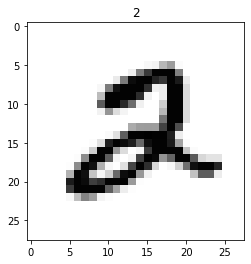

In [9]:
plt.imshow(training_images[5] , cmap ='Greys')
plt.title(training_labels[5])

**3. Pre-processing the data**

In [14]:
#Pre-processing the data
# GRADED FUNCTION: reshape_and_normalize

def reshape_and_normalize(images):
    
    ### START CODE HERE

    # Reshape the images to add an extra dimension
    images = images.reshape((images.shape[0] , images.shape[1] , images.shape[2] , 1))
    
    # Normalize pixel values
    images = images / images.max()
    
    ### END CODE HERE

    return images

In [15]:
# Reload the images in case you run this cell multiple times
(training_images, _), _ = tf.keras.datasets.mnist.load_data(path=data_path) 

# Apply your function
training_images = reshape_and_normalize(training_images)

print(f"Maximum pixel value after normalization: {np.max(training_images)}\n")
print(f"Shape of training set after reshaping: {training_images.shape}\n")
print(f"Shape of one image after reshaping: {training_images[0].shape}")

Maximum pixel value after normalization: 1.0

Shape of training set after reshaping: (60000, 28, 28, 1)

Shape of one image after reshaping: (28, 28, 1)


**4. Defining your callback**

In [26]:
# GRADED CLASS: myCallback
### START CODE HERE

# Remember to inherit from the correct class
class myCallback(tf.keras.callbacks.Callback):
    # Define the method that checks the accuracy at the end of each epoch
    def on_epoch_end(self , epoch , log={}):
      if log.get('accuracy')>= 0.995 :
        # stop training
        print('Reached 99.5% accuracy so cancelling training!')
        self.model.stop_training=True

### END CODE HERE

**5. Convolutional Model**

In [31]:
# GRADED FUNCTION: convolutional_model
def convolutional_model():
    ### START CODE HERE

    # Define the model
    model = tf.keras.models.Sequential([ 
                                        
      tf.keras.layers.Conv2D(32, (3,3) , activation='relu' , input_shape=(28,28,1)),
      tf.keras.layers.MaxPool2D(2,2),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units=128 , activation=tf.nn.relu),
      tf.keras.layers.Dense(units=10 , activation=tf.nn.softmax)

    ]) 

    ### END CODE HERE

    # Compile the model
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy']) 
        
    return model

**6. Train your model**

In [32]:
# Save your untrained model
model = convolutional_model()

# Instantiate the callback class
callbacks = myCallback()

# Train your model (this can take up to 5 minutes)
history = model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1570 - accuracy: 0.9538
Epoch 2/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0540 - accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0343 - accuracy: 0.9888
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0225 - accuracy: 0.9929
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0152 - accuracy: 0.9951


In [33]:
print(f"Your model was trained for {len(history.epoch)} epochs")


Your model was trained for 5 epochs


**7. Visualization**

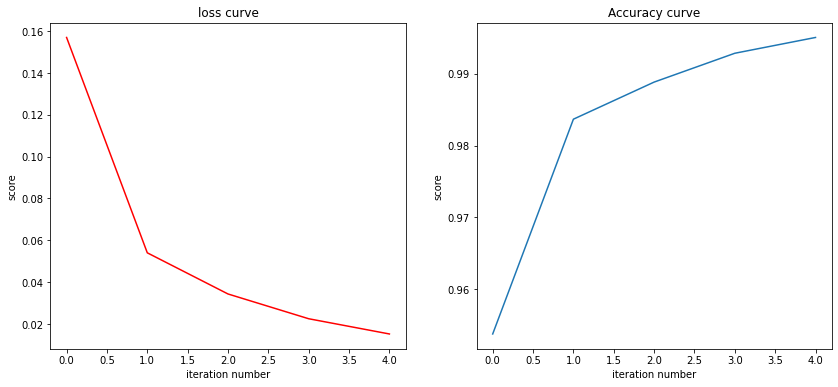

In [34]:
# Training track
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'] ,'r')
plt.title('loss curve')
plt.xlabel('iteration number')
plt.ylabel('score')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.title('Accuracy curve')
plt.xlabel('iteration number')
plt.ylabel('score')
plt.show()